In [2]:
# Run the script to see the Bollinger Bands plot and analysis for XRP since 2017

In [3]:
! pip install pandas numpy yfinance matplotlib seaborn

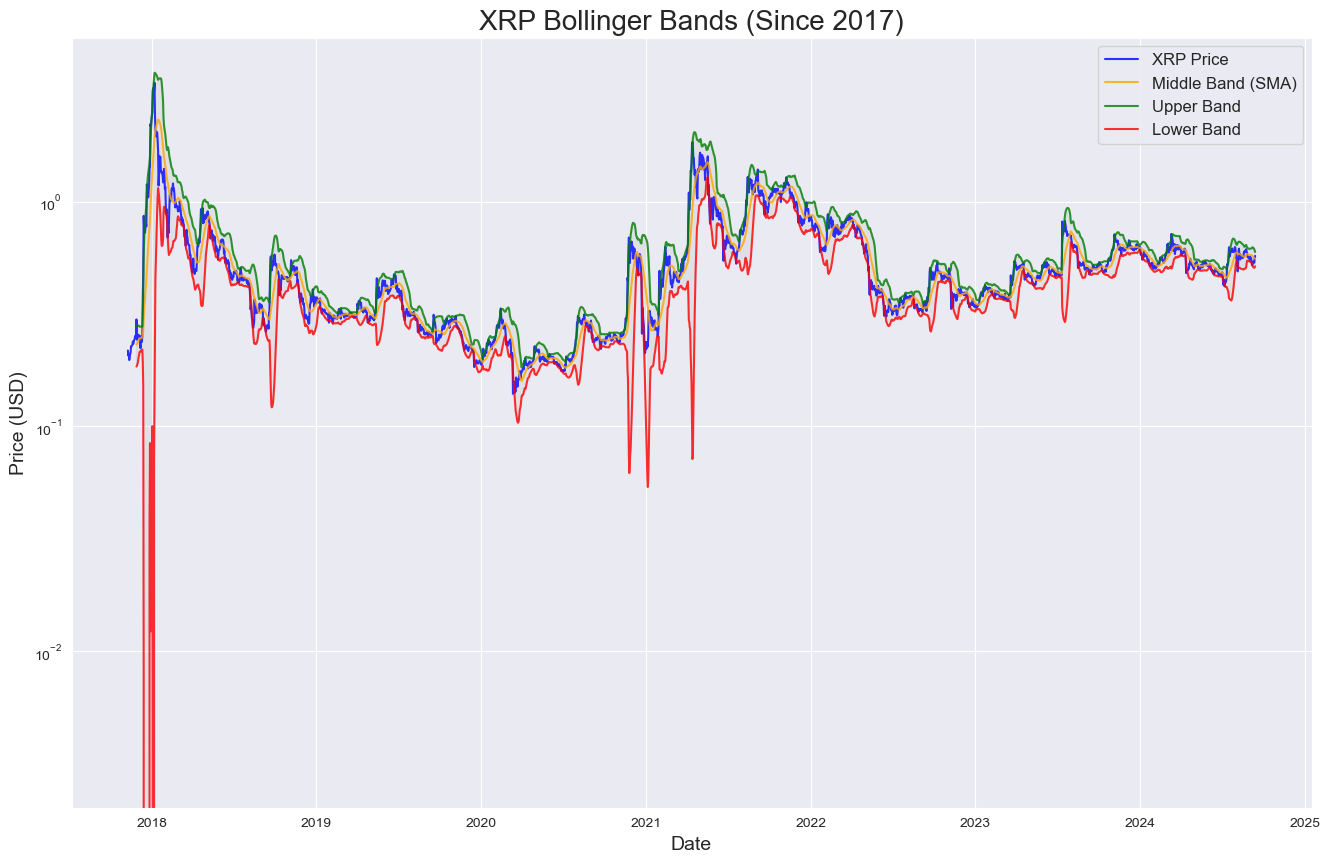

Current XRP Price: $0.5731
Middle Band: $0.5562
Upper Band: $0.5972
Lower Band: $0.5151
Bollinger Bandwidth: 0.1476
XRP is currently trading within the Bollinger Bands
Percentage of time above upper band: 6.36%
Percentage of time below lower band: 5.04%


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

def fetch_xrp_data(start_date, end_date):
    xrp = yf.Ticker("XRP-USD")
    data = xrp.history(start=start_date, end=end_date)
    return data

def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    
    return rolling_mean, upper_band, lower_band

def plot_bollinger_bands(data, middle_band, upper_band, lower_band):
    plt.figure(figsize=(16, 10))
    sns.set_style("darkgrid")
    
    plt.plot(data.index, data['Close'], label='XRP Price', color='blue', alpha=0.8)
    plt.plot(data.index, middle_band, label='Middle Band (SMA)', color='orange', alpha=0.8)
    plt.plot(data.index, upper_band, label='Upper Band', color='green', alpha=0.8)
    plt.plot(data.index, lower_band, label='Lower Band', color='red', alpha=0.8)
    
    plt.fill_between(data.index, upper_band, lower_band, alpha=0.1, color='gray')
    
    plt.title('XRP Bollinger Bands (Since 2017)', fontsize=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.yscale('log')  # Use log scale for better visualization of price movements
    
    plt.show()

def analyze_bollinger_bands(data, middle_band, upper_band, lower_band):
    current_price = data['Close'].iloc[-1]
    current_middle = middle_band.iloc[-1]
    current_upper = upper_band.iloc[-1]
    current_lower = lower_band.iloc[-1]
    
    print(f"Current XRP Price: ${current_price:.4f}")
    print(f"Middle Band: ${current_middle:.4f}")
    print(f"Upper Band: ${current_upper:.4f}")
    print(f"Lower Band: ${current_lower:.4f}")
    
    bandwidth = (current_upper - current_lower) / current_middle
    print(f"Bollinger Bandwidth: {bandwidth:.4f}")
    
    if current_price > current_upper:
        print("XRP is currently trading above the upper Bollinger Band (potentially overbought)")
    elif current_price < current_lower:
        print("XRP is currently trading below the lower Bollinger Band (potentially oversold)")
    else:
        print("XRP is currently trading within the Bollinger Bands")
    
    # Calculate percentage of time price spent above/below bands
    total_days = len(data)
    days_above_upper = sum(data['Close'] > upper_band)
    days_below_lower = sum(data['Close'] < lower_band)
    
    print(f"Percentage of time above upper band: {days_above_upper/total_days*100:.2f}%")
    print(f"Percentage of time below lower band: {days_below_lower/total_days*100:.2f}%")

def main():
    start_date = "2017-01-01"
    end_date = datetime.now().strftime("%Y-%m-%d")
    
    xrp_data = fetch_xrp_data(start_date, end_date)
    
    window = 20
    num_std = 2
    middle_band, upper_band, lower_band = calculate_bollinger_bands(xrp_data, window, num_std)
    
    plot_bollinger_bands(xrp_data, middle_band, upper_band, lower_band)
    analyze_bollinger_bands(xrp_data, middle_band, upper_band, lower_band)

if __name__ == "__main__":
    main()

In [5]:
# This code does the following:
# 1.Imports necessary libraries: pandas for data manipulation, numpy for numerical operations, yfinance for fetching XRP data, matplotlib and seaborn for plotting.
# 2. Defines a function fetch_xrp_data() to retrieve XRP price data since 2017 using yfinance.
# 3. Implements calculate_bollinger_bands() to compute Bollinger Bands with a 20-day window and 2 standard deviations.
# 4. Creates plot_bollinger_bands() to visualize the XRP price along with the Bollinger Bands using a logarithmic scale for better visualization of long-term price movements.
# 5. Includes analyze_bollinger_bands() to provide insights on the current price position relative to the bands, bandwidth analysis, and percentage of time the price spent above/below the bands.
# 6. The main() function orchestrates the entire process, fetching data, calculating Bollinger Bands, plotting, and analyzing.